Visualización usando Base
===

**Bibliografía**.

> [An introduction to R](https://cran.r-project.org/doc/manuals/R-intro.pdf) by W. N. Venables, D. M. Smith and the R Core Team  
[Matplotlib gallery](http://matplotlib.org/gallery.html#lines_bars_and_markers) at matplotlib.org  
[R Graph Catalog](http://shiny.stat.ubc.ca/r-graph-catalog/)  
[The R Graph Gallery](http://www.r-graph-gallery.com)

---

## Introducción

El lenguaje R posee tres sistemas tradicionales de graficación:
* Base
* Lattice
* ggplot2

Sin embargo, recientemente se han desarrollado otras librerias gráficas como:
* [rBokeh](http://hafen.github.io/rbokeh/)
* [LightningR](https://github.com/Ermlab/lightning-rstat)  

y se ha desarrollado un [puerto de ggplot](http://blog.yhat.com/posts/ggplot-for-python.html) para Python. Es así como el aprendizaje y dominio de los sistemas de graficación para ambos lenguajes resulta muy beneficioso para el profesional del área.


En este tutorial se presentan ejemplos de graficos construidos usando el sistema base del lenguaje R. Muchos de los parámetros tienen valores por defecto. Solo se ilustran los principales parámetros y debe consultar la ayuda para cada función para ver más opciones de personalización. 

## Librerías

El sistema base se carga por defecto, por lo que las funciones pueden ser llamadas directamente.  

Para poder emplear en Jupyter las funciones que permiten manipular   algunas propiedades de los gráficos (tal como `options`) es necesario cargar la librería `Cairo`. 

In [1]:
# para poder modificar el tamaño del gráfico en la pantalla.
library(Cairo)    

## Ejemplo

En este ejemplo se graficará la función $\sin(x)$ para $-2\pi \le x \le 2\pi$. En la creación de la primera gráfica se asume que los datos estan almacenados en los vectores numéricos `x` y `y`; este es el caso típico en muchos lenguajes de programación. Pero en el lenguaje R, los datos están usualmente almacenados en un dataframe; en este caso se utiliza la función [`with`](https://stat.ethz.ch/R-manual/R-devel/library/base/html/with.html) para accesar los datos en las columnas del dataframe. Es así como la segunda gráfica ejemplifica como graficar desde un dataset.

In [2]:
# los datos pueden estar almacenados en vectores
x <- seq(from = -2*pi,        # para `x` desde ...
         to = 2*pi,           # para `x` hasta ...
         length.out = 101 )   # cantidad de puntos
y <- sin(x) 

# o pueden estar almacenaddos en un dataframe.
df <- data.frame(X = x, Y = y)

La gráfica puede ser realizada para las variables o para las columnas del dataframe.  

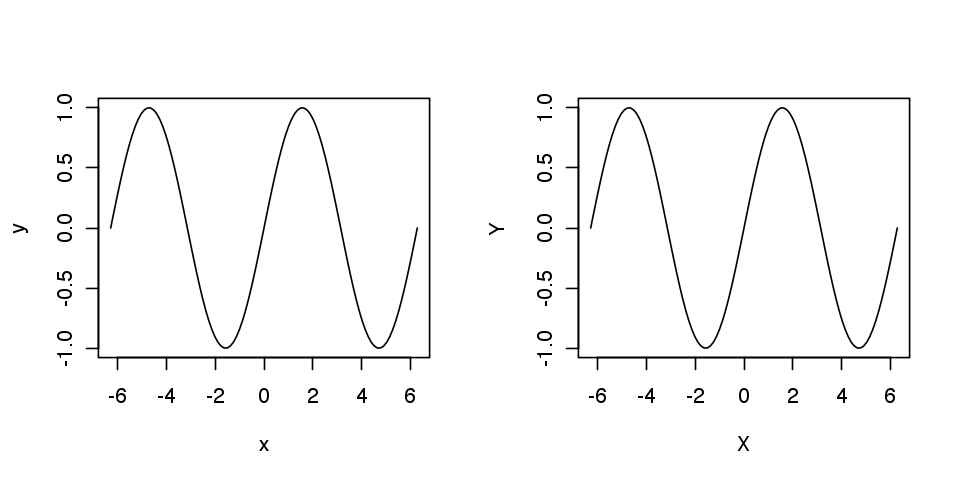

In [3]:
# Modifica el tamaño del gráfico en la pantalla.
options(repr.plot.width=8, repr.plot.height=4)

# Dos gráficos organizados en una cuadrícula de 1x2
par(mfrow = c(1, 2))  

# Llamada directa de plot para graficar las variables.
plot(x, y, type = 'l')

# Llamada con with. Aca X y Y se refieren a las columnas del dataframe.
with(df, plot(X, Y, type = 'l'))


Las gráficas pueden ser salvadas al disco duro.


Haga click [aquí](https://stat.ethz.ch/R-manual/R-devel/library/grDevices/html/png.html) para obtener ayuda sobre como salvar una gráfica a un archivo en disco.

In [4]:
png(filename='files/sin.png')  # especifica el nombre del archivo
plot(x, y, type = 'l')         # grafica directamente al archivo
dev.off()                      # cierra el archivo

pdf 
  2

## Gráficos de dispersión

> [`plot {base}`](https://stat.ethz.ch/R-manual/R-devel/library/graphics/html/plot.html)

Estos gráficos se usan para visualizar la relación entre dos variables `x` y `y`.

Esta es la función genérica para graficación. Para iniciar se ejemplificarán sus opciones graficando las funciones `sin`  y `cos`.

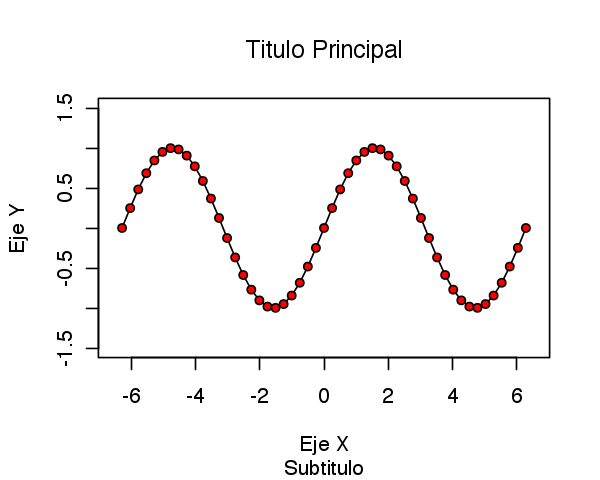

In [5]:
# modifica el tamaño del gráfico en la pantalla.
options(repr.plot.width=5, repr.plot.height=4) 

# se generan los puntos del eje x
x <- seq(from = -2*pi,       # para `x` desde ...
         to = 2*pi,          # para `x` hasta ...
         length.out = 51 )   # cantidad de puntos

# se generan los puntos de las dos curvas
y1 <- sin(x)              
y2 <- sin(2*x)

# se realiza la gráfica
plot(x = x,                      # vector con los valores de x 
     y = y1,                     # vector con los valores de y1 = sin(x)
     type = 'o',                 # 'o' - líneas y puntos
     xlim = c(-6.5, 6.5),        # límites en el eje X
     ylim = c(-1.5, 1.5),        # límites en el eje Y
     main = "Titulo Principal",  # título de la figura
     sub = "Subtitulo",          # subtítulo de la figura
     xlab = 'Eje X',             # texto del eje X
     ylab = 'Eje Y',             # texto del eje Y 
     col = 'black',              # color de la línea, incluyendo los bordes de los puntos
     pch = 21,                   # tipo de punto, valores válidos del 1 al 24
     cex = 0.8,                  # factor de magnificación de los puntos 
     bg = 'red')                 # color de relleno del punto


El parámetro `type` representa el tipo de graficación. A continuación se ilustran sus opciones validas.

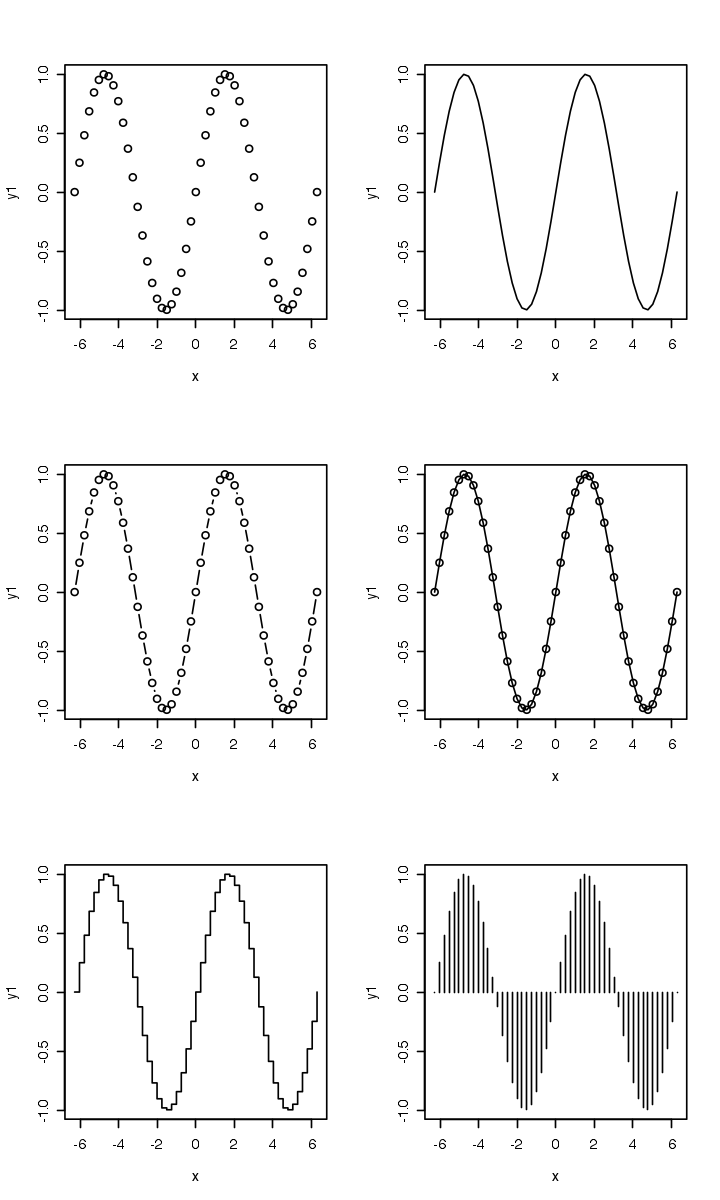

In [6]:
# modifica el tamaño del gráfico en la pantalla.
options(repr.plot.width=6, repr.plot.height=10) 
par(mfrow = c(3, 2)) # gráficos organizados en matriz (3x2)

plot(x = x, y = y1, type = 'p')  # "p" -- puntos
plot(x = x, y = y1, type = 'l')  # "l" -- líneas
plot(x = x, y = y1, type = 'b')  # "b" -- puntos y líneas
plot(x = x, y = y1, type = 'o')  # "o" -- puntos sobre las líneas
plot(x = x, y = y1, type = 's')  # "s" -- escalera
plot(x = x, y = y1, type = 'h')  # "h" -- histograma

El parámetro `lty` representa el tipo de línea. Su valores válidos se presentan a continuación. Los parámetros `lty`  y `type` son comunes a muchas funciones de graficación en las tres librerías.

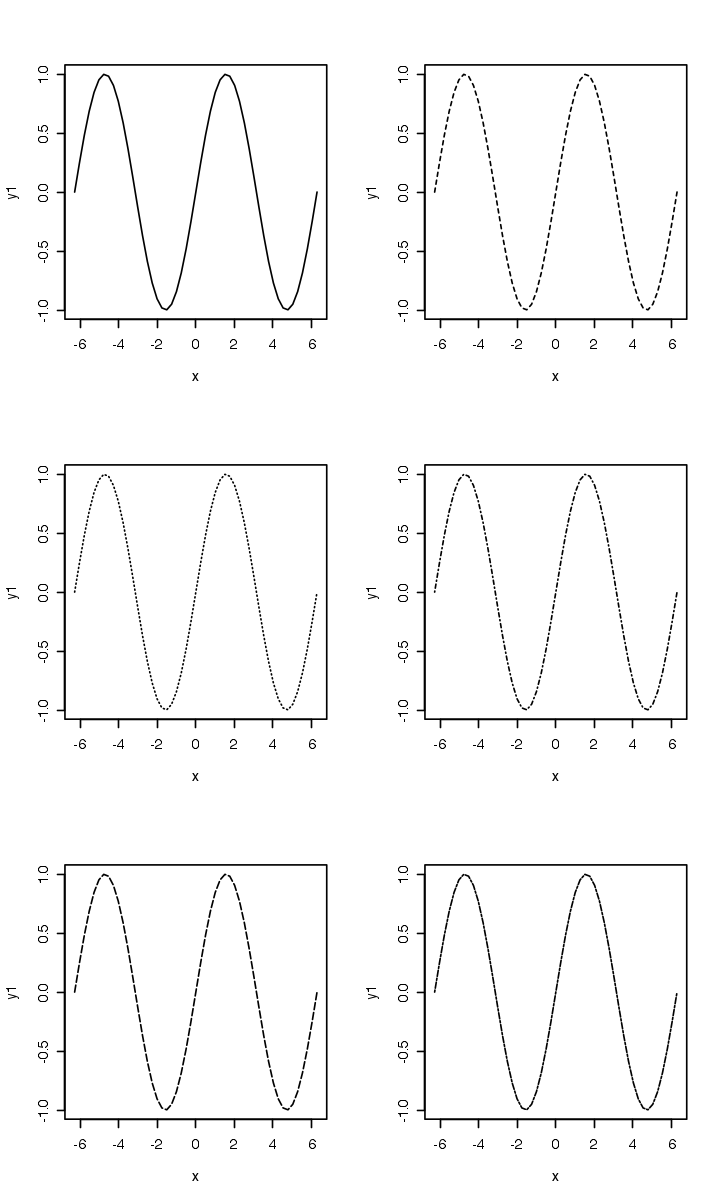

In [7]:
options(repr.plot.width=6, repr.plot.height=10)  
par(mfrow = c(3, 2)) # gráficos organizados en matriz (3x2)

plot(x = x, y = y1, type = 'l', lty = 'solid')  
plot(x = x, y = y1, type = 'l', lty = 'dashed')  
plot(x = x, y = y1, type = 'l', lty = 'dotted')  
plot(x = x, y = y1, type = 'l', lty = 'dotdash')  
plot(x = x, y = y1, type = 'l', lty = 'longdash') 
plot(x = x, y = y1, type = 'l', lty = 'twodash')  


## Personalización de gráficos

> [`title {base}`](https://stat.ethz.ch/R-manual/R-devel/library/graphics/html/title.html)  
[`grid {base}`](https://stat.ethz.ch/R-manual/R-devel/library/graphics/html/grid.html)  
[`rug {base}`](https://stat.ethz.ch/R-manual/R-devel/library/graphics/html/rug.html)  
[`abline {base}`](https://stat.ethz.ch/R-manual/R-devel/library/graphics/html/abline.html)  
[`legend {base}`](https://stat.ethz.ch/R-manual/R-devel/library/graphics/html/legend.html)  

En esta sección se ilustra el uso de diferentes opciones de personalización de los gráficos. La personalización se puede realizar con las siguientes funciones. 

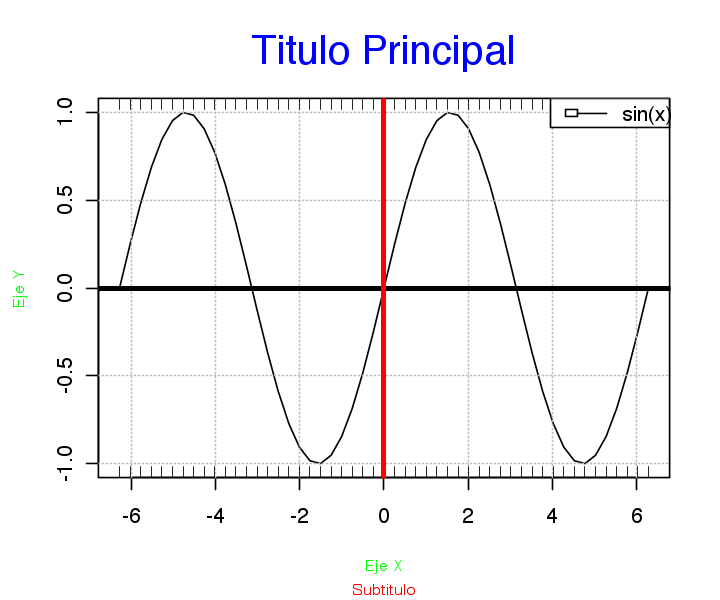

In [8]:
options(repr.plot.width=6, repr.plot.height=5) 
plot(x = x, 
     y = y1, 
     type = 'l',
     main = NA,
     ylab = NA,
     xlab = NA)

# Se personaliza el título.
# `cex` indica el factor de magnificación. 
# `col` indica el color
title(main ="Titulo Principal", 
      sub = "Subtitulo",
      xlab = 'Eje X',
      ylab = 'Eje Y',
      cex.main = 2,    col.main= "blue",
      cex.sub = 0.75,  col.sub = "red",
      cex.lab = 0.75,  col.lab = "green")

# Se agrega la malla
grid(col = "gray",    # color    
     lty = "dotted",  # tipo de línea
     lwd = 1)         # ancho de la línea

# Se marcan los datos en el eje X
rug(x , side = 1) # parte inferior
rug(x , side = 3) # parte superior

# la función abline puede ser usada para adicionar 
# líneas verticales y horizontales simulando los ejes
abline(h = 0, lwd = 3)              # linea horizontal en y = 0 y ancho (lwd) = 3
abline(v = 0, lwd = 3, col = 'red') # linea horizontal en x = 0 y ancho (lwd) = 3


# opciones válidas para x: 
#    "bottomright", "bottom", "bottomleft", "left", 
#    "topleft", "top", "topright", "right", "center"
legend(x = 'topright', 
       legend = c('sin(x)'), 
       fill = NULL, 
       col = c('black'),
       border = "black", 
       bg = 'white',
       lty = 'solid', 
       lwd = 1, 
       pch = NA,
       horiz = FALSE,
       merge = FALSE
      )

> [`lines {base}`](https://stat.ethz.ch/R-manual/R-devel/library/graphics/html/lines.html)  
[`points {base}`](https://stat.ethz.ch/R-manual/R-devel/library/graphics/html/points.html)

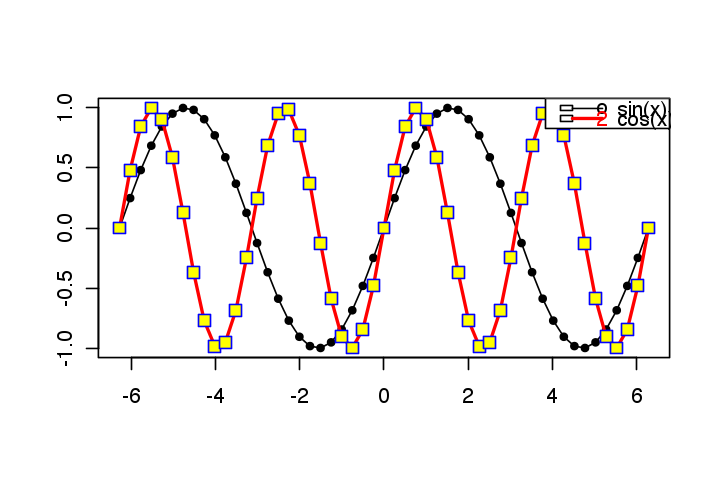

In [9]:
options(repr.plot.width=6, repr.plot.height=4)

# función sin(x)
plot(x = x, 
     y = y1, 
     type = 'o',
     main = NA, 
     sub = NA,
     xlab = NA,
     ylab = NA,
     pch = 20)

# para agregar la segunda función (y2 = sin(3x))
# se deben agregar las líneas y los puntos separadamente

lines(x = x,       
      y = y2,
      type = 'l',  # 'p', 'l', 'o', 'h', 's'
      lty = 'solid',
      col = 'red',
      lwd = 2)

points(x = x,
       y = y2,
       cex = 1.5,      # factor de magnificación del punto
       pch = 22,       # 21-circulo, 22-cuadrado, 23-rombo, 24- triangulo, 25-triangulo inv. 
       col = 'blue',   # contorno del punto
       bg = 'yellow')  # relleno del punto

legend(x = 'topright', 
       legend = c('sin(x)', 'cos(x)'), 
       fill = NULL, 
       col = c('black', 'red'),
       border = "black", 
       bg = 'white',
       lty = 'solid', 
       lwd = c(1, 2), 
       pch = c('o', 22),
       horiz = FALSE,
       merge = FALSE
      )


> [`polygon {base}`](https://stat.ethz.ch/R-manual/R-devel/library/graphics/html/polygon.html)

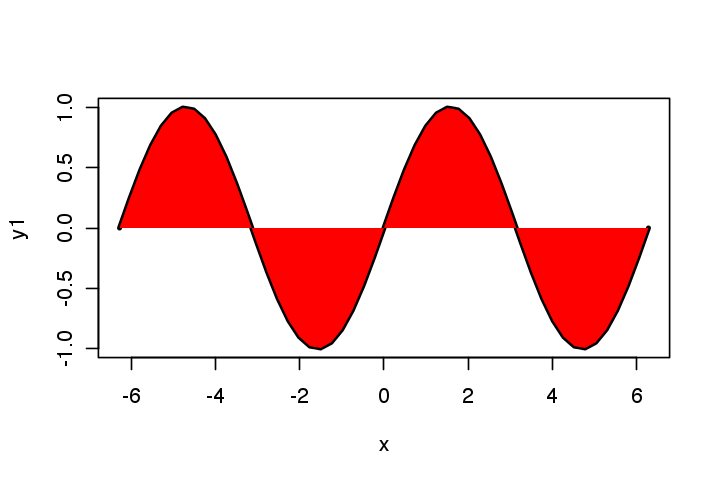

In [10]:
# `polygon` dibuja un polígono relleno
# En este caso se desea rellenar el área bajo la curva.
options(repr.plot.width=6, repr.plot.height=4) 

plot(x,                          # x
     y1,                         # y = f(x)
     type = 'l',                 # tipo de línea ('p', 'l', 'o', 'h', 's')
     lty = 1,                    # tipo de línea: 1 - continua
     lwd = 3)                    # ancho de la línea

# se deben completar los puntos del polígono 
# para cerrarlo adicionando las coordenadas en x
# en order inverso y poniéndoles cero para el eje y.

p.x = c(x, rev(x))               # genera un poligono, puntos en X
p.y1 = c(y1, rep(0, length(x)))  # puntos en Y

polygon(x = p.x, 
        y = p.y1,
        col = 'red',             # color de relleno del polígono
        border = NA)             # sin borde


> [`plot.new`](https://stat.ethz.ch/R-manual/R-devel/library/graphics/html/frame.html)  
[`plot.window`](https://stat.ethz.ch/R-manual/R-devel/library/graphics/html/plot.window.html)  
[`axis`](https://stat.ethz.ch/R-manual/R-devel/library/graphics/html/axis.html)

Este grupo de funciones (y las siguientes) se usan para personalizar gráficos o para crear nuevas funciones gráficas.

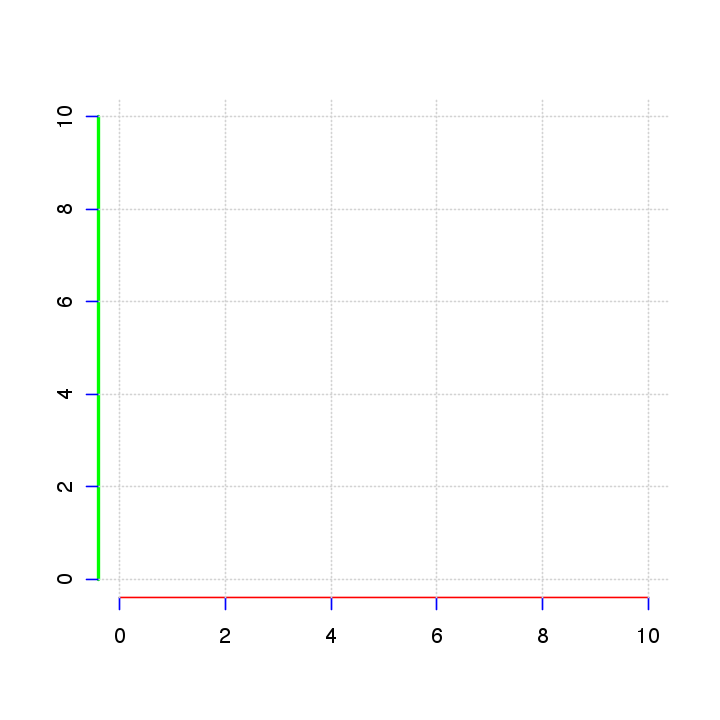

In [11]:
options(repr.plot.width=6, repr.plot.height=6) 

plot.new()                           # crea una gráfica vacía

# define los límites de la gráfica.
plot.window(xlim = c(0, 10),         # límites del eje x
            ylim = c(0, 10),         # límites del eje y
            log = "",                # logaritmicos?
            asp = NA)                # aspecto

# grafica los ejes.
axis(side = 1,                       # 1=below, 2=left, 3=above and 4=right
     at = NULL,                      # ubicación de las divisiones del eje
     labels = TRUE,                  #
     tick = TRUE,                    #
     lty = "solid",                  # tipo de línea
     lwd = 1,                        # grosor de la línea
     lwd.ticks = 1,                  # ancho de las marcas
     col = 'red',                    # color de la línea
     col.ticks = 'blue')             # color de los marcadores

axis(side = 2,                       # 1=below, 2=left, 3=above and 4=right
     at = NULL,                      # ubicación de las divisiones del eje
     labels = TRUE,                  #
     tick = TRUE,                    #
     lty = "solid",                  # tipo de línea
     lwd = 2,                        # grosor de la línea
     lwd.ticks = 1,                  # ancho de las marcas
     col = 'green',                  # color de la línea
     col.ticks = 'blue')             # color de los marcadores

# agrega la malla interior (solo para visualizar)
grid()   

> [`text`](https://stat.ethz.ch/R-manual/R-devel/library/graphics/html/text.html)  
[`mtext`](https://stat.ethz.ch/R-manual/R-devel/library/graphics/html/mtext.html)  
[`arrows`](https://stat.ethz.ch/R-manual/R-devel/library/graphics/html/arrows.html)  
[`segments`](https://stat.ethz.ch/R-manual/R-devel/library/graphics/html/segments.html)  
[`rect`](https://stat.ethz.ch/R-manual/R-devel/library/graphics/html/rect.html)  

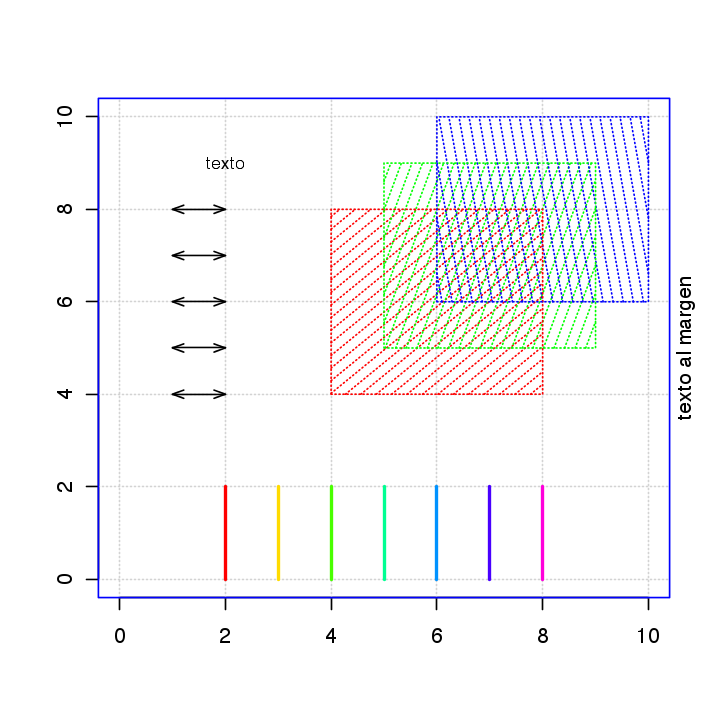

In [12]:
# se inicia con la misma gráfica anterior
options(repr.plot.width=6, repr.plot.height=6) 
plot.new()                           # crea una gráfica vacía
plot.window(xlim = c(0, 10),         # límites del eje x
            ylim = c(0, 10),         # límites del eje y
            log = "",                # logaritmicos?
            asp = NA)                # aspecto

axis(side = 1)
axis(side = 2)
grid()


# hasta aquí igual que el ejemplo anterior.

# caja alrededor de la gráfica
box(lty = 'solid', col = 'blue')         

text(x = 2,                           # coordenada en X
     y = 9,                           # coordenada en Y
     labels = 'texto',                # texto
     cex = 0.8)                       # factor de magnificación

mtext(text = 'texto al margen',       # texto
      side = 4,                       # 1=bottom, 2=left, 3=top, 4=right
      adj = NA,                       # ubicación (NA=centrado)
      padj = NA,                      # distancia respecto al eje (NA=cerca)
      cex = NA,                       # factor de manificación 
      col = NA)                       # color

arrows(x0 = 1, 
       y0 = 4:8, 
       x1 = 2, 
       y1 = 4:8, 
       col = 'black', 
       length = 0.1,                  # tamaño de la flecha
       angle = 20,                    # angulo de la flecha
       code = 3,                      # 1- extremo inicial, 2- extremo final, 3- ambos
       lwd = 1)

segments(x0 = 2:8,                    # vector de coordenadas iniciales en x para cada línea
         y0 = 0,                      # vector de coordenadas iniciales en y para cada línea
         x1 = 2:8,                    # vector de coordenadas finales en x para cada línea
         y1 = 2,                      # vector de coordenadas finales en y para cada línea
         col = rainbow(7),            # color de las líneas 
         lty = 1,                     # tipo de línea
         lwd = 2)                     # ancho de la línea

rect(xleft = 4:6,                     # x - esquina inferior izquierda
     ybottom = 4:6,                   # y - esquina inferior izquierda
     xright = 8:10,                   # x - esquina superior derecha
     ytop = 8:10,                     # y - esquina superior derecha
     density = 10,                    # densidad del rayado
     angle = 10+30*1:3,               # ángulo de las lineas de rayado
     col = rainbow(3),                # vector de colores
     border = NULL,                   # 
     lty = 'dotted',                  # tipo de línea del rayado
     lwd = 1)                         # grueso de línea del rayado  

> [`clip {base}`](https://stat.ethz.ch/R-manual/R-devel/library/graphics/html/clip.html)

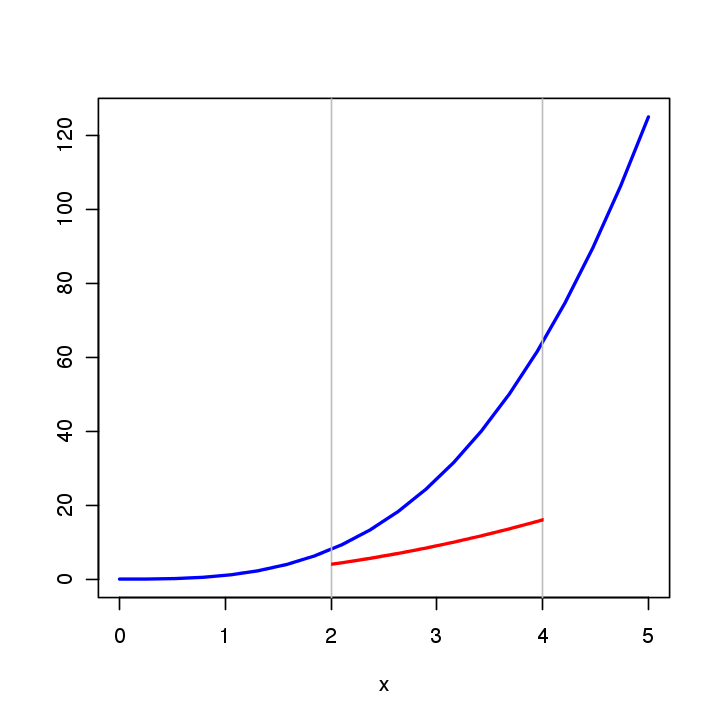

In [13]:
x <- seq(from = 0, to = 5, length.out = 20)

y2 <- x^2  
y3 <- x^3

plot(x = x,           # grafica x^3
     y = y3,
     col = 'blue',
     type = 'l',
     lwd = 2,
     ylab = NA)

# almacena los parámetros actuales para el usuario
usr <- par("usr") 

abline(v = 2, col = 'gray')
abline(v = 4, col = 'gray')


clip(x1 = 2, 
     x2 = 4, 
     y1 = usr[3], 
     y2 = usr[4])


# las líneas solo se gráfican en la región definida
# por la función clip aunque x y y2 están definidas
# sobre todo el dominio de la función.
lines(x = x,
      y = y2,
      col = 'red',
      type = 'l',
      lwd = 2,
      ylab = NA)

## Graficación de funciones matemáticas

> [`curve {base}`](https://stat.ethz.ch/R-manual/R-devel/library/graphics/html/curve.html)  

La función `curve` se usa para graficar directamente las funciones si generar explicitamente los puntos.

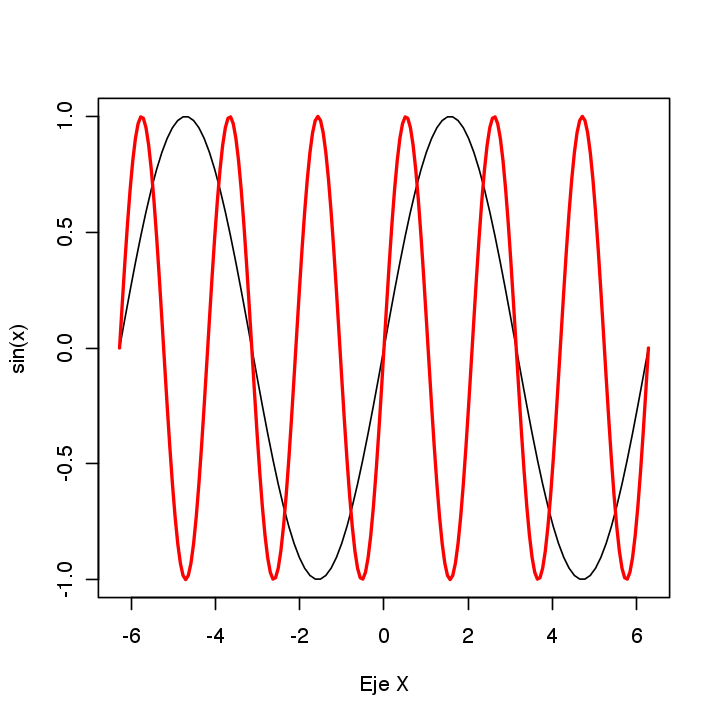

In [14]:
curve(expr = sin,     # función a graficar
      from = -2 * pi, # 
      to = 2 * pi,    # 
      n = 101,        # número de puntos (valor por defecto)
      add = FALSE,    # TRUE - para agregar a la gráfica anterior
      type = "l",     # tipo de linea
      xname = "x",    # nombre de la variable 
      title = NULL,   # titulo principal del gráfico
      sub = NULL,     # subtítulo del eje X 
      xlab = 'Eje X', #  
      ylab = NULL,    # por defecto `sin(x)`
      log = NULL,     # en escala logaritmica
      xlim = NULL)    # 

f <- function(x) sin(3*x)
    
curve(expr = f,       # función a graficar
      n = 201,        # número de puntos (valor por defecto)
      add = TRUE,     # TRUE - para agregar a la gráfica anterior
      type = "l",     # tipo de linea
      col = 'red',    # color de la línea
      lwd = 2)        # ancho de la línea 


## Visualización de distribuciones univariadas

> [`hist {base}`](https://stat.ethz.ch/R-manual/R-devel/library/graphics/html/hist.html)

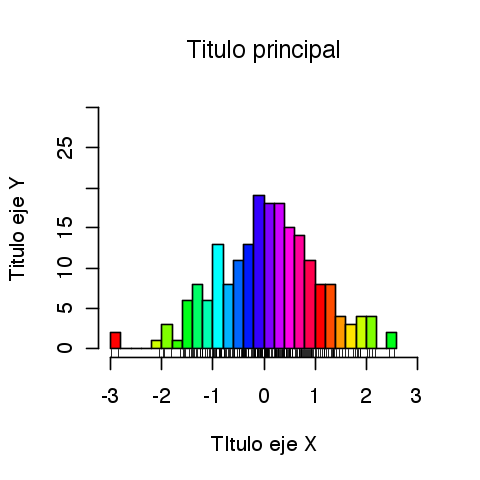

In [15]:
options(repr.plot.width=4, repr.plot.height=4)  

# se generan 200 puntos aletorios normales 
# con u = 0 y s = 1
x <- rnorm(200)             
hist(x,                               # la variable
     col=rainbow(20),                 # color del histograma
     xlab = "TItulo eje X",           # titulo del eje X
     ylab = "Titulo eje Y",           # titulo del eje Y
     main = "Titulo principal",       # titulo del grafico
     xlim = c(-3, 3),                 # limites eje X
     ylim = c(0, 30),                 # limite eje Y
     breaks = 20)                     # número de bins

rug(x)                                # datos en el eje X


> [`boxplot {base}`](https://stat.ethz.ch/R-manual/R-devel/library/graphics/html/boxplot.html)

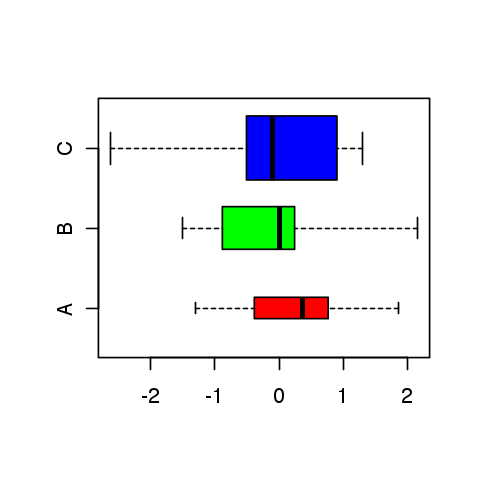

In [16]:
x = matrix(rnorm(30), 10, 3)

boxplot(x = x, 
        range = 0.0,                     # extensión del bigote 
        width = c(1, 2, 3),              # anchos relativos de las cajas
        varwidth = FALSE,                # ancho relativo a la cantidad de puntos en cada caja
        notch = FALSE,                   # dibuja el notch?
        outline = TRUE,                  # grafica los outliers
        names = LETTERS[1:3],            # nombres
        border = par("fg"),              # colores de los bordes
        col = rainbow(3),                # colores de las cajas
        horizontal = TRUE,               # horizontal o vertical?
        add = FALSE,                     # adiciona el gráfico a la figura existente?
        at = NULL)                       # coordenadas cuando se adiciona a otro gráfico

> [`barplot {base}`](https://stat.ethz.ch/R-manual/R-devel/library/graphics/html/barplot.html)


Paletas de colores:  
* [`rainbow {base}`](https://stat.ethz.ch/R-manual/R-devel/library/grDevices/html/palettes.html)
* [`gray {base}`](https://stat.ethz.ch/R-manual/R-devel/library/grDevices/html/gray.html)

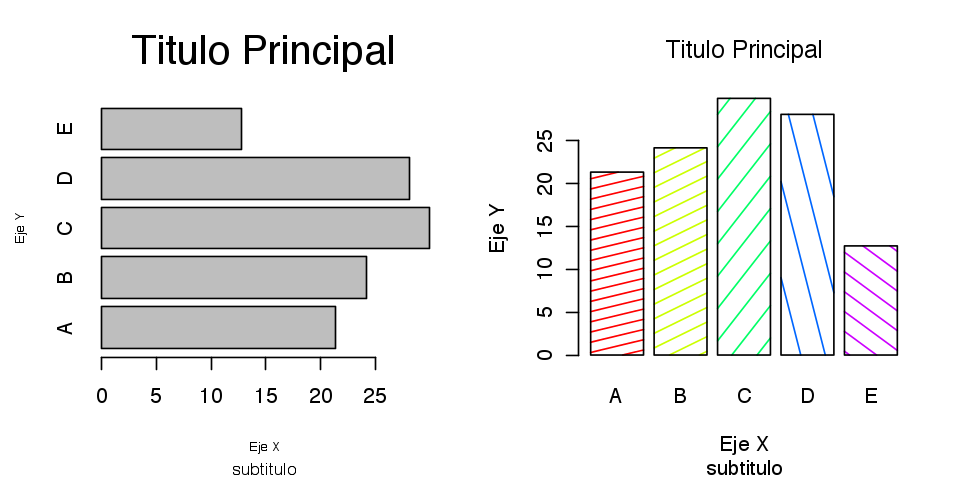

In [17]:
options(repr.plot.width=8, repr.plot.height=4)  

par(mfrow = c(1, 2))               # gráficos organizados en matriz 

N <- 5                             # cantidad de barras
x <- runif(N, min = 10, max = 30)  # datos de cada barra
x.names <- LETTERS[1:N]            # nombres de cada barra

barplot(height = x,                # longitud de las barras
        horiz = TRUE,              # TRUE - horizontal, FALSE - vertical
        names.arg = x.names,       # nombres de las barras 
        cex.main = 2.0,            # factor de magnificación del título principal
        cex.lab = 0.6,             # factor de magnificación de los títulos de los ejes
        cex.sub = 0.8,             # factor de magnificación del subtitulo 
        main = 'Titulo Principal', 
        sub = 'subtitulo', 
        xlab = 'Eje X',
        ylab = 'Eje Y')


barplot(height = x,                # longitud de las barras
        horiz = FALSE,             # TRUE - horizontal, FALSE - vertical
        names.arg = x.names,    
        density = 6,               # densidad de las líneas de relleno
        angle = 15 + 20*1:5,       # angulo de las líneas de relleno en grados
        col = rainbow(5),          # colores 
        main = 'Titulo Principal', 
        axisnames = TRUE,          # TRUE - grafica los ejes, FALSE - no los grafica
        sub = 'subtitulo', 
        xlab = 'Eje X',
        ylab = 'Eje Y')

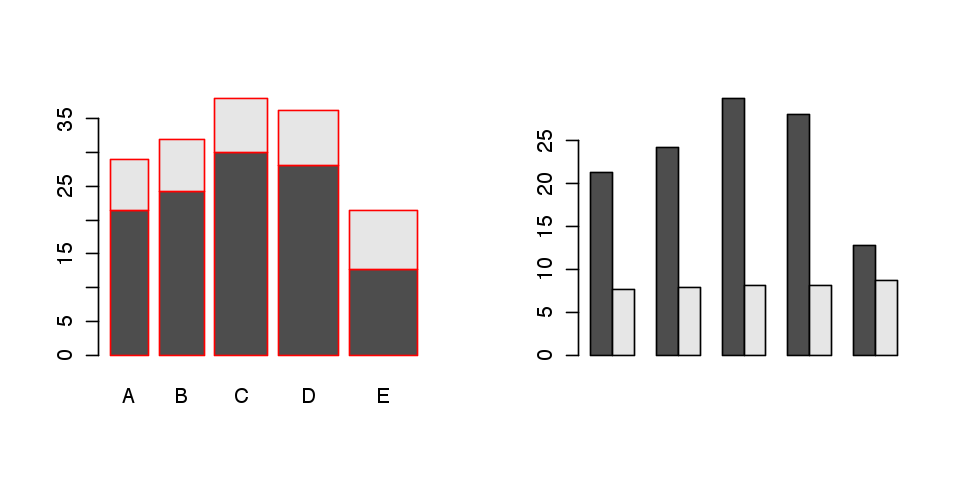

In [18]:
par(mfrow = c(1, 2))              # gráficos simultáneos 

y <- runif(N, min = 5, max = 10)  # datos para una nueva barra
barplot(height = rbind(x, y),     # datos en forma de columna           
        horiz = FALSE,            # TRUE - horizontal, FALSE - vertical
        beside = FALSE,           # TRUE - no apilada, FALSE - apilada 
        border = "red",           # color del borde
        width = 80 + 20*1:5,      # anchos de las barras
        names.arg = x.names)

barplot(height = rbind(x, y),                
        horiz = FALSE,            # TRUE - horizontal, FALSE - vertical
        beside = TRUE)            # TRUE - no apilada, FALSE - apilada
 

> [`dotchart {base}`](https://stat.ethz.ch/R-manual/R-devel/library/graphics/html/dotchart.html)

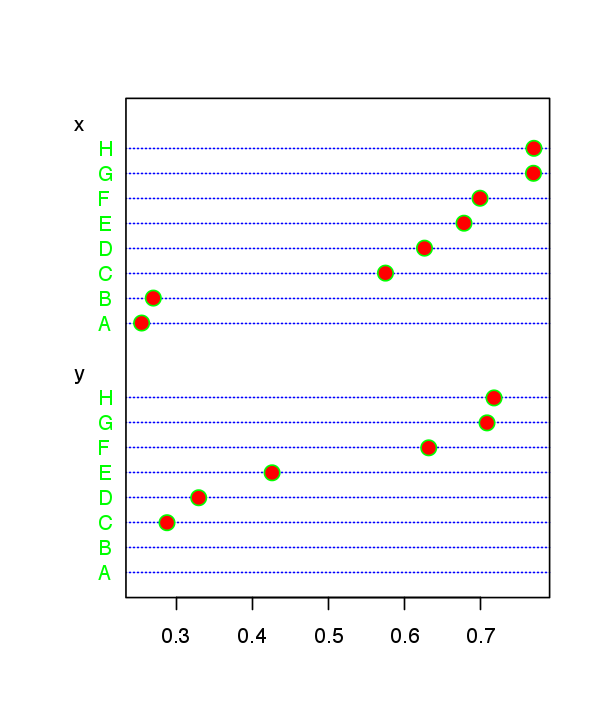

In [19]:
options(repr.plot.width=5, repr.plot.height=6)  
x <- sort(runif(8))
y <- sort(runif(8))
labels <- LETTERS[1:8]
dotchart(x = cbind(x, y),                # datos
         labels = labels,                # nombres
         cex = par("cex"),               #
         pt.cex = 1.6,                   # factor de magnificación de los marcadores
         pch = 21,                       # tipo de marcador (21 a 24 tienen relleno) 
         bg = 'red',                     # relleno de los puntos
         color = 'green',                # color de las letras
         lcolor = "blue",                # color de las líneas horizontales para cada dato
         xlim = range(x[is.finite(x)]),  # límites del eje X
         main = NULL,                    # título principal
         xlab = NULL,                    # eje X
         ylab = NULL)                    # eje Y


> [`pie {base}`](https://stat.ethz.ch/R-manual/R-devel/library/graphics/html/pie.html)

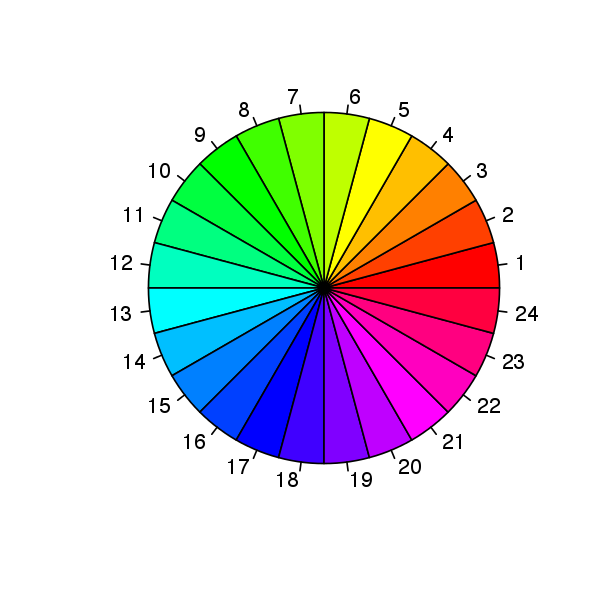

In [20]:
options(repr.plot.width=5, repr.plot.height=5)  

x <- rep(1, 24) 
pie(x = x,              # los puntos a graficar
    labels = names(x),  # nombres de los puntos 
    edges = 200,        # número de lados del polígono que aproxima el círculo
    radius = 1.0,       # radio del círculo
    clockwise = FALSE,  # sentido en que se grafica
    init.angle = 0,     # angulo inicial en que empiza la primera área
    density = NULL,     # densidad de las líneas de relleno
    angle = 45,         # ángulo de las líneas de relleno
    col = rainbow(24),  # colores del relleno
    border = NULL,      # color de las líneas interiores 
    lty = NULL,         # líneas interiores 
    main = NULL)        # título principal


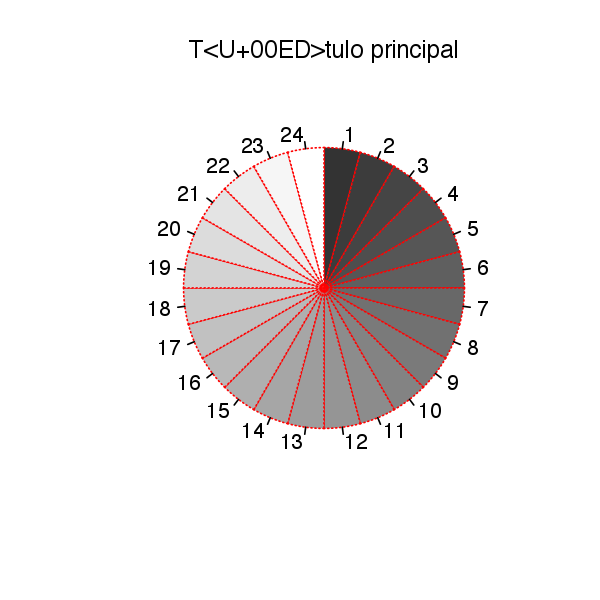

In [21]:
# rango de grises
colores <- gray(seq(0.2, 1.0, length = 24))

pie(x = x,                     # los puntos a graficar
    labels = names(x),         # nombres de los puntos 
    edges = 200,               # número de lados del polígono que aproxima el círculo
    radius = 0.8,              # radio del círculo
    clockwise = TRUE,          # sentido en que se grafica
    init.angle = 90,           # angulo inicial en que empiza la primera área
    density = NULL,            # sombreado
    angle = 45,                # sombreado
    col = colores,             # colores de relleno
    border = 'red',            # color de las líneas interiores  
    lty = 'dotted',            # tipo de línea
    main = 'Título principal') # título principal

# pie(pie.sales, density = 10, angle = 15 + 10 * 1:6)

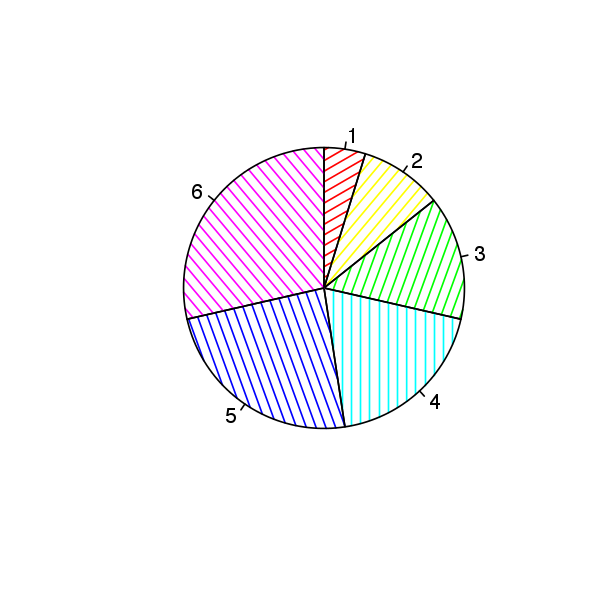

In [22]:
x <- rep(1:6)
pie(x = x,                     # los puntos a graficar
    labels = names(x),         # nombres de los puntos 
    edges = 200,               # número de lados del polígono que aproxima el círculo
    radius = 0.8,              # radio del círculo
    clockwise = TRUE,          # sentido en que se grafica
    init.angle = 90,           # angulo inicial en que empiza la primera área
    density = 8,               # sombreado
    angle = 10 +  20 * 1:6,    # sombreado
    col = rainbow(6),          # colores de relleno
    border = 'black',          # color de las líneas interiores  
    lty = NULL,                # tipo de línea
    main = NULL)               # título principal

## Superficies y otros gráficos tridimensionales

> [`persp {base}`](https://stat.ethz.ch/R-manual/R-devel/library/graphics/html/persp.html)  
[`contour {base}`](https://stat.ethz.ch/R-manual/R-devel/library/graphics/html/contour.html)

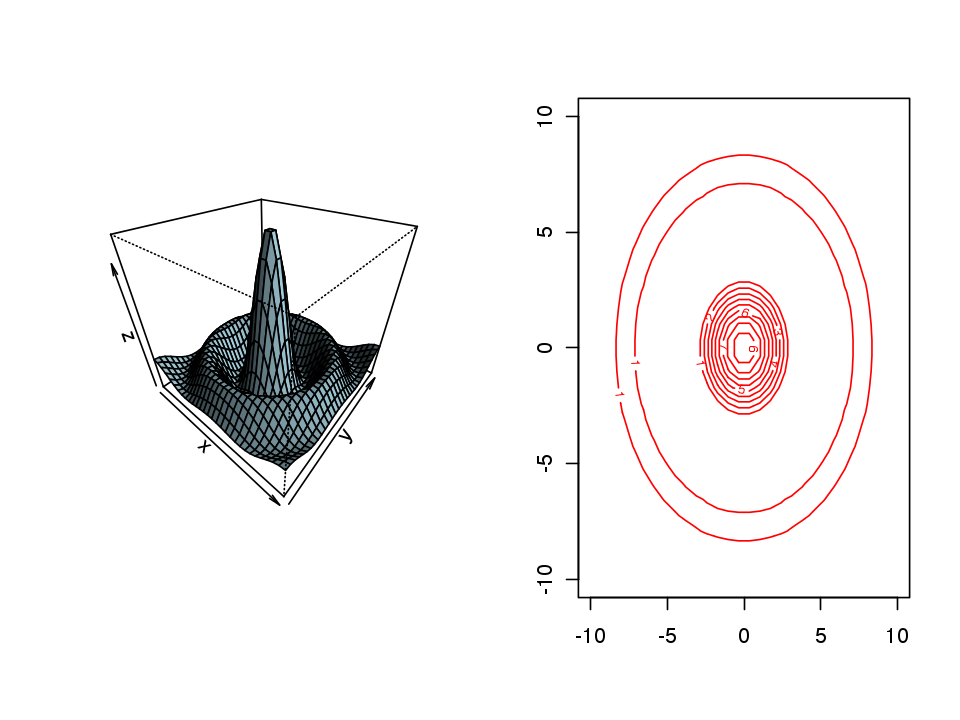

In [23]:
# genera la información para la función
x <- seq(-10, 10, length= 30)
y <- x
f <- function(x, y) { r <- sqrt(x^2+y^2); 10 * sin(r)/r }
z <- outer(x, y, f)
z[is.na(z)] <- 1

# opciones gráficas
options(repr.plot.width=8, repr.plot.height=6)  
par(mfrow = c(1, 2)) # gráficos simultáneos 

persp(x = x,                             # vector con puntos sobre el eje x
      y = y,                             # vector con puntos sobre el eje y
      z = z,                             # matriz z(x, y)
      xlim = range(x),                   # límites para el eje x
      ylim = range(y),                   # límites para el eje y
      zlim = range(z, na.rm = TRUE),     # límites para el eje z
      xlab = NULL,                       #
      ylab = NULL,                       # 
      zlab = NULL,                       #
      main = NULL,                       #
      sub = NULL,                        #
      theta = 40,                        # ángulo para definir la vista
      phi = 35,                          # ángulo para definir la vista
      r = 1,                             # distancia del punto de vista al centro del cubo
      d = 1,                             # factor para controlar la perspectiva
      expand = 1,                        # factor de expansión del eje z
      col = "lightblue",                 #
      border = NULL,                     #
      ltheta = 120,                      # ángulos para definir el sombreado
      lphi = 0,                          # ángulos para definir el sombreado
      shade = 0.75,                      # sombreado
      box = TRUE,                        # dibuja el cubo alrededor de la superficie 
      axes = TRUE,                       # coloca nombres en los ejes
      nticks = 5,                        # número de marcas en los ejes
      ticktype = "simple")               # tipo de marcas en los ejes ('simple', 'detailed') 

contour(x = x,                           #
        y = y,                           #
        z = z,                           #
        nlevels = 10,                    # número de líneas de nivel
        levels = 1:10,                   # valores de las líneas de nivel
        labels = NULL,                   # textos para las líneas de nivel
        xlim = range(x),                 #
        ylim = range(y),                 #
        zlim = range(z),                 # 
        labcex = 0.6,                    # factor de magnificación
        drawlabels = TRUE,               #  
        method = "flattest",             # 'flattest', 'edge'
        axes = TRUE,                     # dibuja ejes?
        col = 'red',                     # color de las líneas de nivel
        lty = 1,                         # tipo de lineas 
        lwd = 1,                         # grueso de las líneas
        add = FALSE)                     #



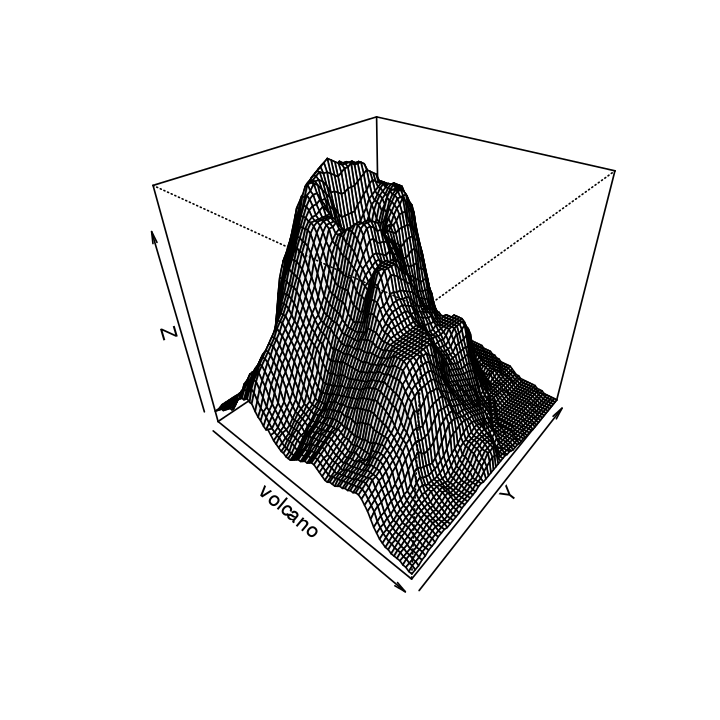

In [24]:
options(repr.plot.width=6, repr.plot.height=6) 

persp(volcano, theta = 40, phi = 35, shade = 0.20, ltheta = 120, lphi = 30)

> [`filled.contour {base}`](https://stat.ethz.ch/R-manual/R-devel/library/graphics/html/filled.contour.html)

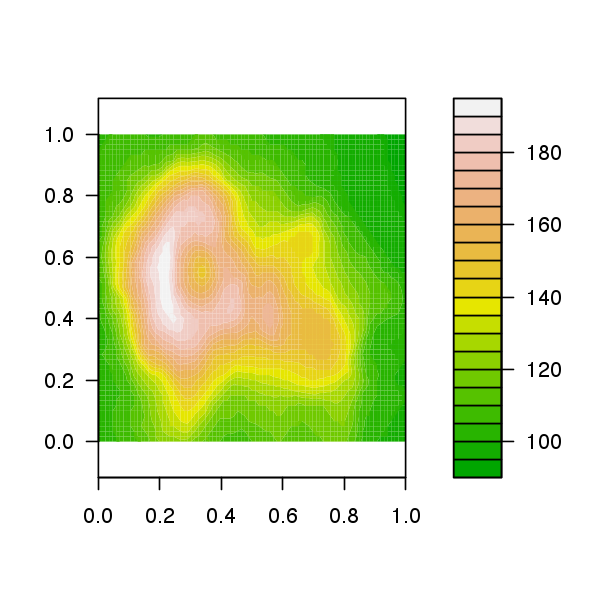

In [25]:
options(repr.plot.width=5, repr.plot.height=5)
filled.contour(volcano, color = terrain.colors, asp = 1)

> [`image {base}`](https://stat.ethz.ch/R-manual/R-devel/library/graphics/html/image.html)

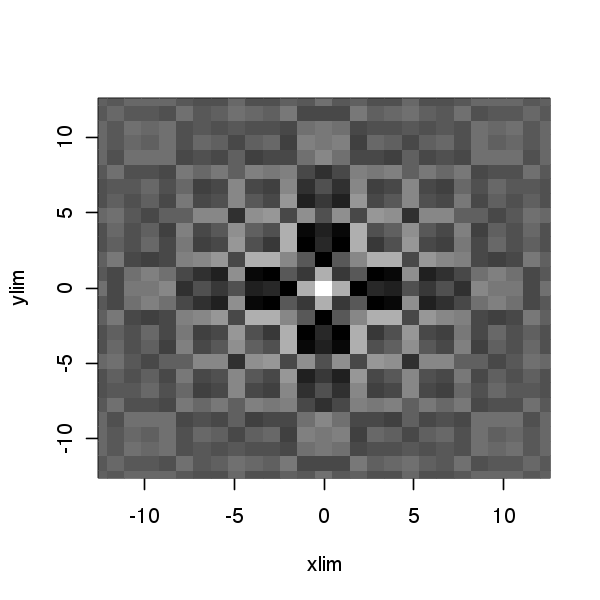

In [26]:
# crea la función a graficar
x <- y <- seq(-4*pi, 4*pi, len = 27)

# r es una matriz que representa las alturas
r <- sqrt(outer(x^2, y^2, "+"))
z <- cos(r^2)*exp(-r/6)

image(x = x,                        # vector que representa los valores del eje x
      y = y,                        # vector que representa los valores del eje y
      z = z,                        # matriz que representa las alturas para los puntos (x,y)
      zlim = c(min(z), max(z)),     # límites 
      xlim = c(min(x), max(x)),     # límites
      ylim = c(min(y), max(y)),     # límites
      col = gray((0:32)/32),        # paleta de colores 
      add = FALSE,                  # se adiciona a la gráfica actual?
      xaxs = "i",                   # estilo del eje x 
      yaxs = "i",                   # estilo del eje y
      xlab = NULL,                  # título eje x
      ylab = NULL)                  # título eje y
